In [1]:
import sys
sys.path.append('../')

import numpy as np
import pygme
from pygme.phc import PhotCryst, Lattice
from pygme.shapes import Square

%load_ext autoreload
%autoreload 2

from pygme.gme import GuidedModeExp
from pygme.utils import plot_reciprocal

## Initialize a photonic crystal

Check out the other notebooks for more cool examples.

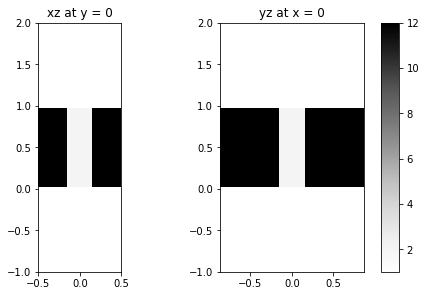

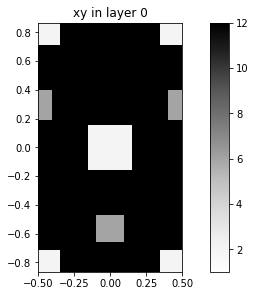

In [2]:
# Initialize a lattice
lattice = Lattice('hexagonal')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add shapes to this layer 

# We can add shapes in two different ways:
phc.layers[-1].add_shape('square', {'x_cent': 0, 'y_cent': 0, 'a': 0.3, 'eps': 2})
square = Square(eps=6, x_cent=0.5, y_cent=0.3, a=0.2)
phc.add_shape(square)
phc.plot_overview()

## Compare to FT
The GME uses the FT of the shapes. When we initialize a GME object, this FT is computed up to a truncation order defined by `gmax`. We can then inverse transform back to real space and see what it is we are simulating.  

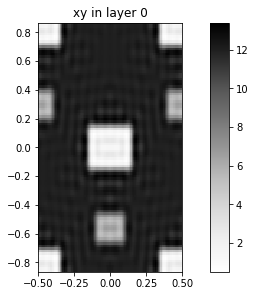

In [3]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Working with polygons

The `Poly` class allows you to do some cool things. For example, you can rotate the polygon with respect to its center of mass.

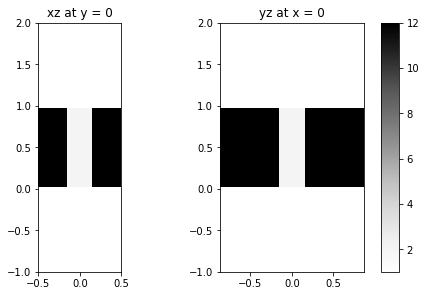

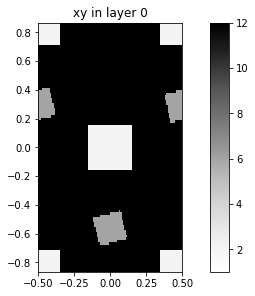

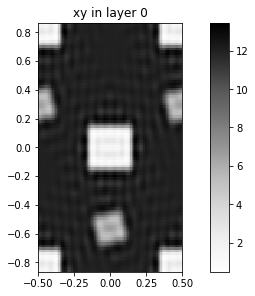

In [4]:
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=12)
phc.layers[-1].add_shape('square', {'x_cent': 0, 'y_cent': 0, 'a': 0.3, 'eps': 2})
square = Square(eps=6, x_cent=0.5, y_cent=0.3, a=0.2)

# Rotate the square counter-clockwise by an angle defined in radians
square.rotate(angle=np.pi/12)

phc.add_shape(square)
phc.plot_overview()

gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

We can also define arbitrary polygons using the coordinates of the edges! And while we're at it let's also add another layer to the PhC.

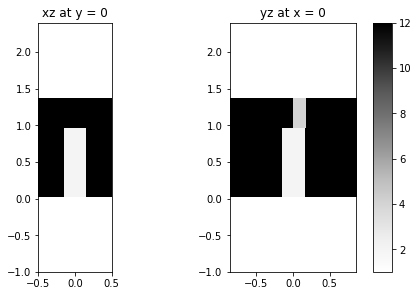

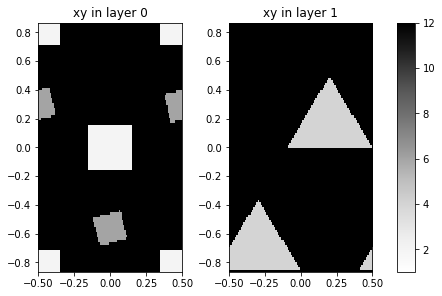

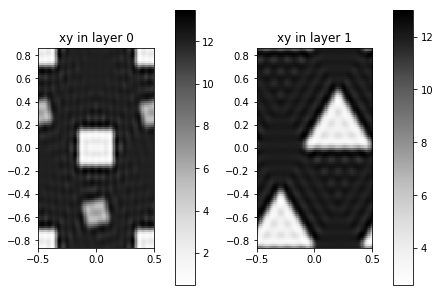

In [5]:
# Arbitrary polygon 
phc.add_layer(d=0.4, eps_b=12)
phc.layers[-1].add_shape('poly', {'x_edges': [-0.1, 0.5, 0.2], 'y_edges': [0, 0, 0.5], 'eps': 4})
phc.plot_overview()
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Caveats

There are two important things to keep in mind:
- Shapes should not overlap.
- Polygons should be defined such that the points circle their interior in a counter-clockwise manner.

There could be fixes for this in the future dunno... But here's what happens if you mess up.

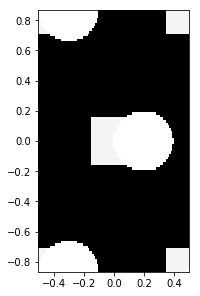

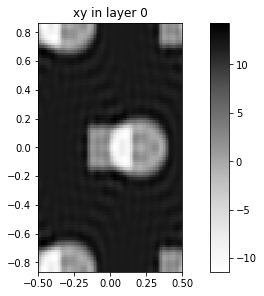

In [6]:
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=12)
phc.add_shape('square', {'x_cent': 0, 'y_cent': 0, 'a': 0.3, 'eps': 2})
phc.add_shape('circle', {'x': 0.2, 'y': 0, 'r': 0.2, 'eps': 1})

phc.plot_cross()

gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

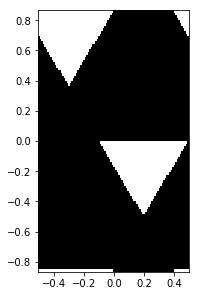

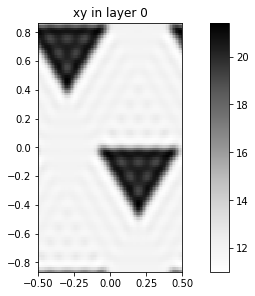

In [7]:
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=12)
phc.add_shape('poly', {'x_edges': [-0.1, 0.5, 0.2], 'y_edges': [0, 0, -0.5], 'eps': 4})

phc.plot_cross()

gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()